In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import tensorflow as tf
import cv2
import os
import random
from PIL import Image

from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

<h1>Data Preprocessing</h1>

<h2>Display Initial Dataset Images</h2>

In [2]:
root = 'QMIND2024_Dataset/dataset_images/'

In [3]:
#function displays the first image in a given subdirectory
def display_first_image_in_subdir(subdir_path):
    if os.path.isdir(subdir_path):
        all_files = os.listdir(subdir_path)

        jpeg_files = [file for file in all_files if file.lower().endswith(('.jpg'))]

        random_jpeg = random.choice(jpeg_files)
        random_jpeg_path = os.path.join(subdir_path, random_jpeg)

        img = cv2.imread(random_jpeg_path)
        
        if img is not None:
            img_resized = cv2.resize(img, (550,550))
            
            cv2.imshow('First JPG Image in %s' %subdir_path, img_resized)
            cv2.waitKey(0)
            cv2.destroyAllWindows()

In [4]:
display_first_image_in_subdir(root)

<h2>Labels Preprocessing</h2>

In [5]:
#with open('QMIND2024_Dataset/final_labels.txt', 'w') as output_file:
#    for file_path in ['QMIND2024_Dataset/label1.txt', 'QMIND2024_Dataset/label2.txt', 'QMIND2024_Dataset/label3.txt']:
#        with open(file_path, 'r') as input_file:
#            output_file.write(input_file.read())

In [6]:
with open('QMIND2024_Dataset/final_labels.txt', 'r') as file:
    lines = file.readlines()

    data = [line.strip().split() for line in lines]

    labels_df = pd.DataFrame(data, columns=['filename', 'label'])

    labels_df['label'] = pd.to_numeric(labels_df['label'], errors='coerce')

print(labels_df.head())

FileNotFoundError: [Errno 2] No such file or directory: 'QMIND2024_Dataset/final_labels.txt'

In [ ]:
unique_counts = labels_df['label'].value_counts()
print(unique_counts)

label
0    6263
2    4475
5    1150
4     912
1     630
3     236
Name: count, dtype: int64


In [ ]:
#delete rows that contain the label value of 5
labels_df = labels_df[labels_df['label'] != 5]
print(labels_df.tail())

               filename  label
13431  007-6953-400.jpg      4
13432  007-6956-400.jpg      4
13433  007-6957-400.jpg      4
13434  007-6958-400.jpg      4
13435  007-6959-400.jpg      4


In [ ]:
#change label values of 1,2,3 to 1 (for non proliferative)
labels_df.loc[labels_df['label'].isin([1, 2, 3]), 'label'] = 1

#change label values of 4 to 2 (for proliferative)
labels_df.loc[labels_df['label'] == 4, 'label'] = 2

In [ ]:
unique_counts = labels_df['label'].value_counts()
print(unique_counts)

label
0    6263
1    5341
2     912
Name: count, dtype: int64


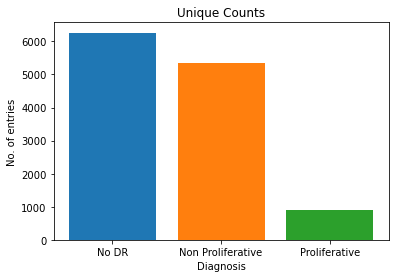

In [ ]:
plt.bar('No DR' , unique_counts[0], label= 'No DR')
plt.bar('Non Proliferative' , unique_counts[1], label = 'Non Proliferative')
plt.bar('Proliferative' , unique_counts[2], label = 'Proliferative')
plt.xlabel("Diagnosis")
plt.ylabel("No. of entries")
plt.title("Unique Counts")
plt.show()

<h2>Image Processing</h2>

In [ ]:
#labels_df['filename'] = 'QMIND2024_Dataset/dataset_images/' + labels_df['filename']

In [ ]:
#labels_df.to_csv('data_files.csv', index=False)

In [ ]:
labels_df = pd.read_csv('data_files.csv')

In [ ]:
print(labels_df.head())

                                            filename  label
0  QMIND2024_Dataset/dataset_images/2017041310262...      0
1  QMIND2024_Dataset/dataset_images/2017041311195...      0
2  QMIND2024_Dataset/dataset_images/2017041311201...      0
3  QMIND2024_Dataset/dataset_images/2017041311201...      0
4  QMIND2024_Dataset/dataset_images/2017041311252...      0


In [ ]:
Train_Generator = ImageDataGenerator(rescale=1./255,
                                    zoom_range=0.1,
                                    rotation_range=90,
                                    horizontal_flip=True,
                                    vertical_flip=True,
                                    fill_mode="nearest",
                                    validation_split=0.1)

In [ ]:
Train_IMG_Set = Train_Generator.flow_from_dataframe(dataframe=labels_df,
                                                   x_col="filename",
                                                   y_col="label",
                                                   color_mode="rgb",
                                                   class_mode="raw",
                                                   batch_size = 50,
                                                   subset="training")

Found 11241 validated image filenames.


c:\Users\siyun\anaconda3\envs\tf_env\Lib\site-packages\keras\src\preprocessing\image.py:1137: UserWarning: Found 26 invalid image filename(s) in x_col="filename". These filename(s) will be ignored.
  warnings.warn(


In [ ]:
validation_IMG_Set = Train_Generator.flow_from_dataframe(dataframe=labels_df,
                                                   x_col="filename",
                                                   y_col="label",
                                                   color_mode="rgb",
                                                   class_mode="raw",
                                                   batch_size = 50,
                                                   subset="validation")

Found 1249 validated image filenames.


In [ ]:
total_train_images = Train_IMG_Set.n
print(f"Total number of training images: {total_train_images}")

total_validation_images = validation_IMG_Set.n
print(f"Total number of validation images: {total_validation_images}")

Total number of training images: 11241
Total number of validation images: 1249


In [ ]:
for i, (images, labels) in enumerate(Train_IMG_Set):
    print(f"Batch {i}, Image batch shape: {images.shape}, Labels batch shape: {labels.shape}")
    if i == 1: 
        break

Batch 0, Image batch shape: (50, 256, 256, 3), Labels batch shape: (50,)
Batch 1, Image batch shape: (50, 256, 256, 3), Labels batch shape: (50,)


50


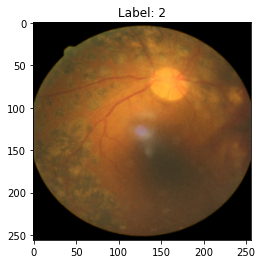

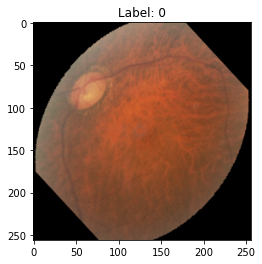

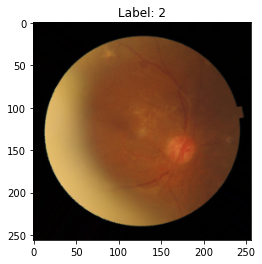

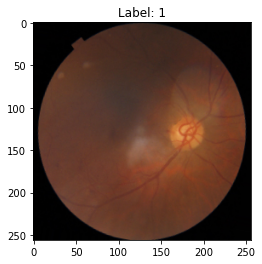

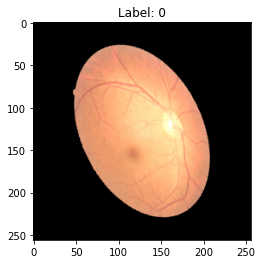

In [ ]:
images, labels = next(Train_IMG_Set)
print(len(images))

for i in range(5): 
    plt.imshow(images[i])
    plt.title(f"Label: {labels[i]}")
    plt.show()